# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [128]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [129]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [130]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


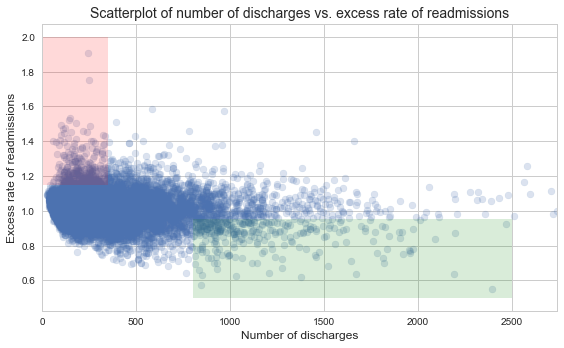

In [131]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Initial observations based on the plot above
#### Overall, rate of readmissions is trending down with increasing number of discharges: 
True based on the figure below.

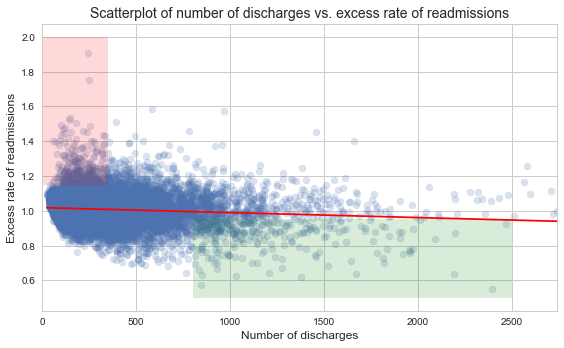

In [132]:
slope, intercept = np.polyfit(x, y, 1)                              
xr = [x[0], x[-1]]
yr = [slope*i+intercept for i in xr]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.plot(xr,yr, color='red')    

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout() 

In [133]:
# Number of high excess rate of readmissions incidents for low number of discharge:
high_excess_rate_low_discharge = clean_hospital_read_df.loc[(clean_hospital_read_df['Excess Readmission Ratio']>1)&(clean_hospital_read_df['Number of Discharges']<350)]['Excess Readmission Ratio'].count()
low_excess_rate_low_discharge = clean_hospital_read_df.loc[(clean_hospital_read_df['Excess Readmission Ratio'])<1&(clean_hospital_read_df['Number of Discharges']<350)]['Excess Readmission Ratio'].count()
print("Number of high excess rate of readmissions incidents for low number of discharge = ", high_excess_rate_low_discharge)
print("Number of low excess rate of readmissions incidents for low number of discharge = ", low_excess_rate_low_discharge)

Number of high excess rate of readmissions incidents for low number of discharge =  3731
Number of low excess rate of readmissions incidents for low number of discharge =  3261


#### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red):  
True

In [134]:
# Number of high excess rate of readmissions incidents for low number of discharge:
high_excess_rate_high_discharge = clean_hospital_read_df.loc[(clean_hospital_read_df['Excess Readmission Ratio']>1)&(clean_hospital_read_df['Number of Discharges']>800)]['Excess Readmission Ratio'].count()
low_excess_rate_high_discharge = clean_hospital_read_df.loc[(clean_hospital_read_df['Excess Readmission Ratio'])<1&(clean_hospital_read_df['Number of Discharges']>800)]['Excess Readmission Ratio'].count()
print("Number of high excess rate of readmissions incidents for high number of discharge = ", high_excess_rate_high_discharge)
print("Number of low excess rate of readmissions incidents for high number of discharge = ", low_excess_rate_high_discharge)

Number of high excess rate of readmissions incidents for high number of discharge =  425
Number of low excess rate of readmissions incidents for high number of discharge =  474


#### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green): 
True

### B. Statistics
#### In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1: 
True

In [135]:
mean_excess_readm = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100]['Excess Readmission Ratio'].mean()
perc_read_high = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']<100)&(clean_hospital_read_df['Excess Readmission Ratio']>1)]['Excess Readmission Ratio'].count()/clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100]['Excess Readmission Ratio'].count()*100
print("Mean excess readmission rate for low discharge = ", mean_excess_readm)
print("Percentage of who have excess readmission rate greater than 1 for low discharge = ", perc_read_high)

Mean excess readmission rate for low discharge =  1.0226183501683506
Percentage of who have excess readmission rate greater than 1 for low discharge =  63.2154882155


#### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1: 
True

In [136]:
mean_excess_readm = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000]['Excess Readmission Ratio'].mean()
perc_read_high = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']>1000)&(clean_hospital_read_df['Excess Readmission Ratio']>1)]['Excess Readmission Ratio'].count()/clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000]['Excess Readmission Ratio'].count()*100
print("Mean excess readmission rate for high discharge = ", mean_excess_readm)
print("Percentage of who have excess readmission rate greater than 1 for high discharge = ", perc_read_high)

Mean excess readmission rate for high discharge =  0.9783354211663071
Percentage of who have excess readmission rate greater than 1 for high discharge =  44.4924406048


### C. Conclusions
#### There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

Null hypothesis: There is no correlation between hospital capacity (number of discharges) and readmission rates
We keep number of discharges (x) fixed and permute the other variable (y), Excess rate of readmissions. 
We use Paerson correlation coefficient as test statistics.

In [137]:
# Define a function that returns Pearson correlation coefficient:
def pearson (data1, data2):
    return np.corrcoef(data1, data2)[0,1]

# Calculate Pearson correlation coefficient for the actual observation:
pearson_obs = pearson(x, y)

print("Observed Pearson Correlation Coefficient : ", pearson_obs)


Observed Pearson Correlation Coefficient :  -0.0930955428759


In [138]:
# Define a function for permutation:
def permute(data1, data2, func, size=1):
    perm_reps = np.empty(size)
    for i in range(size):
        data_perm = np.random.permutation(data2)
        perm_reps[i] = func(data1, data_perm)
    return perm_reps    
perm_pearson = permute(x, y, pearson, 10000)
p = np.sum(np.abs(perm_pearson)>np.abs(pearson_obs))/len(perm_pearson)
print("p-value: ", p)

p-value:  0.0


Since p-value is 0, we reject the null hypothesis. So there is a significant correlation between hospital capacity (number of discharges) and readmission rates

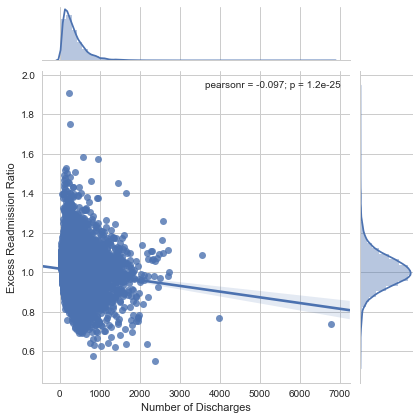

In [139]:
# scatterplot, correlation coefficient, p-value
sns.set(style="whitegrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data= clean_hospital_read_df, kind='reg')
plt.show()

#### Report statistical significance for α = .01: 
Since p-value=0, it represents a statistical significance for α = .01.

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? 
The p-value shows a statistically significant correletation between the number of discharges and the excess readmission ratio. However this correletion is very small. So even though the test hypothesis shows a correletion, this correlation is weak and therefore we cannot confidentally say that there is a correlation between the number of discharges and the excess readmission ratio.

#### Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
Since there is no practical significance, we cannot recommend that smaller hospitals need to increase their resources to prevent readmissions.  

### D. Regulatory policy recommendations
#### Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation
#### Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
Due to lack of practical significance in our study, I cannot recommend this.

#### Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.
In the scatterplot above, the relationship between the number of discharges and the excess readmission ratio is not very clear. It is better to add a regression line to indicate the slight negative relationship between the two.